In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew 
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [182]:
p_test=pd.read_csv("test.csv")
p_train=pd.read_csv("train.csv")

In [101]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [102]:
print("test shape",test.shape)
print("train shape",train.shape)

test shape (1459, 80)
train shape (1460, 81)


In [103]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [105]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [106]:
#remove ID column
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [107]:
train.shape

(1460, 80)

In [108]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [109]:
#missing data
d1=(train.isnull().sum()/len(train))*100
d1=d1.drop(d1[d1==0].index).sort_values(ascending=False)[:30]
missing=pd.DataFrame({"missing ratio":d1})
a=missing.index
missing.head(25)


,missing ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


[]

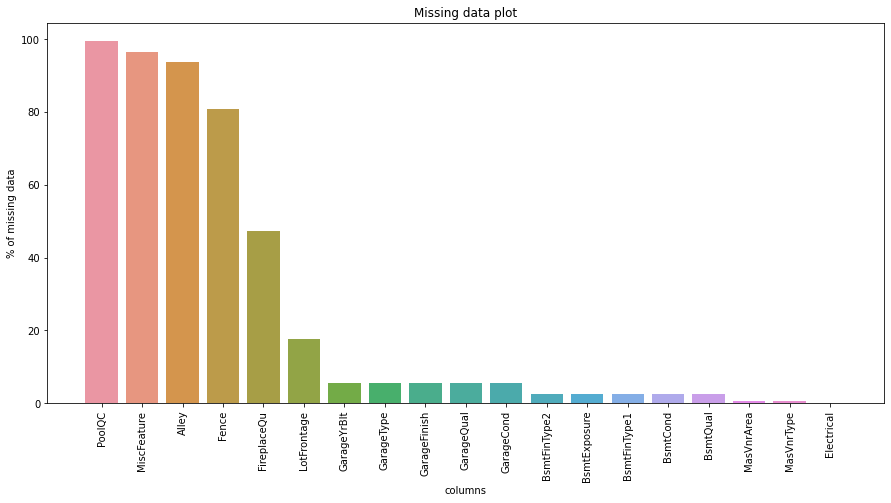

In [110]:
plt.figure(figsize=(15,7))
plt.xticks(rotation="90")
sns.barplot(x=d1.index,y=d1)
plt.xlabel("columns")
plt.ylabel("% of missing data")
plt.title("Missing data plot")
plt.plot()


In [111]:
# missing data in test dataset

In [112]:
p1=((test.isnull().sum())/len(test))*100
p1=p1.drop(p1[p1==0].index).sort_values(ascending=False)
p11=pd.DataFrame({"missing":p1})
p11.head(40)

,missing
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127


In [113]:
test["PoolQC"].isnull().sum()

1456

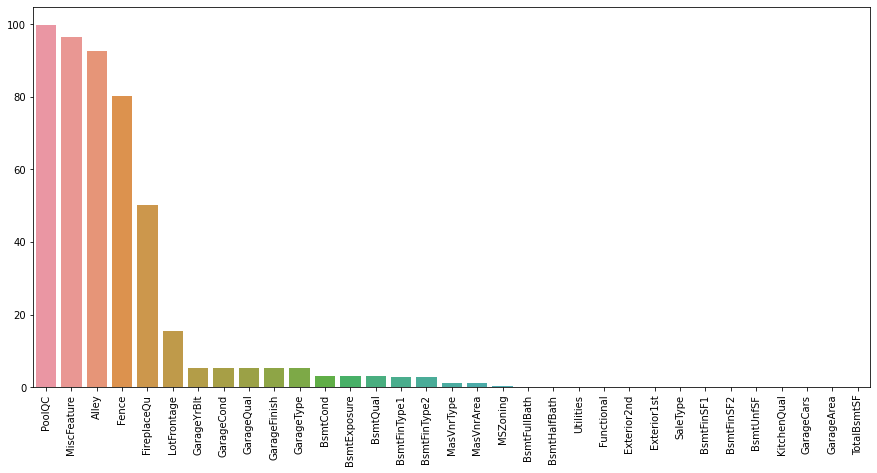

In [114]:
plt.figure(figsize=(15,7))
sns.barplot(p11.index,p1)
plt.xticks(rotation=90)
plt.show()

In [115]:
train["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [116]:
train["PoolArea"].value_counts()# others have no pool

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

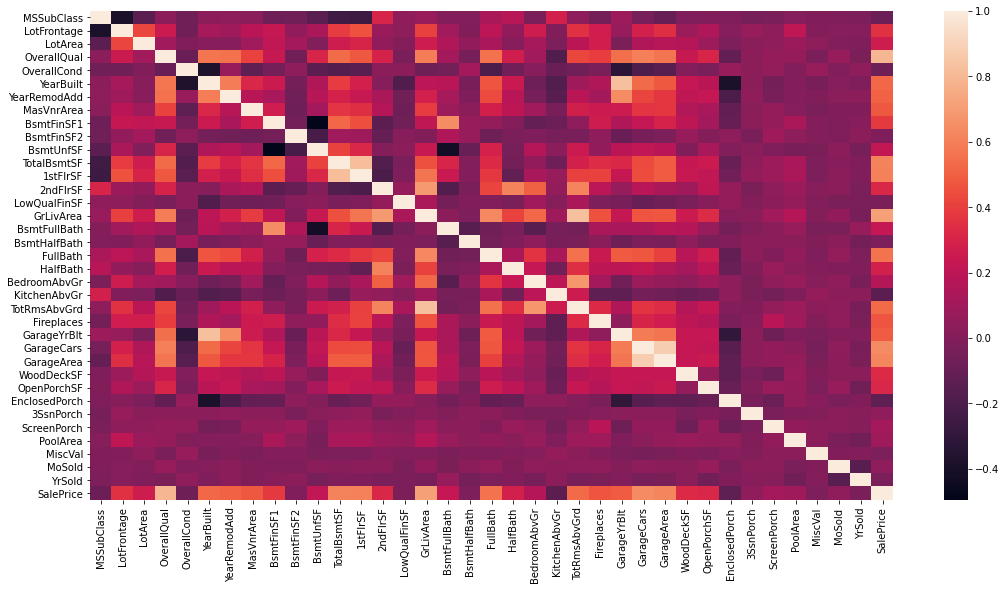

In [117]:
corrmat=train.corr()
plt.figure(figsize=(18,9))
sns.heatmap(corrmat)

In [118]:
#imputing missing data

In [119]:
a

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [120]:
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [121]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [122]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [123]:

       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'

('MasVnrArea', 'MasVnrType', 'Electrical')

In [124]:
train["PoolQC"]=train["PoolQC"].fillna("None")
test["PoolQC"]=test["PoolQC"].fillna("None")


In [125]:
train["MiscFeature"]=train["MiscFeature"].fillna("None")
test["MiscFeature"]=test["MiscFeature"].fillna("None")

In [126]:
train['Alley']=train['Alley'].fillna("None")
test['Alley']=test['Alley'].fillna("None")

In [127]:
train['Fence']=train['Fence'].fillna("None")
test['Fence']=test['Fence'].fillna("None")

In [128]:
train['FireplaceQu']=train['FireplaceQu'].fillna("None")
test['FireplaceQu']=test['FireplaceQu'].fillna("None")

In [129]:
train["LotFrontage"].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [130]:
train.groupby("Neighborhood")["LotFrontage"].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [131]:
train["LotFrontage"]=train.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
test["LotFrontage"]=test.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [132]:
for i in ["GarageType","GarageFinish","GarageQual","GarageCond"]:
    train[i]=train[i].fillna("None")
    test[i]=test[i].fillna("None")

In [133]:
for i in ["GarageYrBlt","GarageArea","GarageCars"]:
    train[i]=train[i].fillna(0)
    test[i]=test[i].fillna(0)  

In [134]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col]=train[col].fillna(0)
    test[col]=test[col].fillna(0) 

In [135]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col]=train[col].fillna(0)
    test[col]=test[col].fillna(0) 

In [136]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
test["MasVnrType"] =test["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [137]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [138]:
test["MSZoning"].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [139]:
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [140]:
train= train.drop(['Utilities'], axis=1)
test = test.drop(['Utilities'], axis=1)

In [141]:
train["Functional"] = train["Functional"].fillna("Typ")
test["Functional"] = test["Functional"].fillna("Typ")

In [142]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [143]:
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

In [144]:
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])

In [145]:
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [146]:
train['MSSubClass'] = train['MSSubClass'].fillna("None")
test['MSSubClass'] = test['MSSubClass'].fillna("None")

In [147]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [148]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 78, dtype: int64

In [149]:
d1=(train.isnull().sum()/len(train))*100
d1=d1.drop(d1[d1==0].index).sort_values(ascending=False)[:30]
missing=pd.DataFrame({"missing ratio":d1})
a=missing.index
missing.head(25)

,missing ratio


In [150]:
p1=((test.isnull().sum())/len(test))*100
p1=p1.drop(p1[p1==0].index).sort_values(ascending=False)
p11=pd.DataFrame({"missing":p1})
p11.head(40)

,missing


In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [153]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [154]:
#EDA


In [155]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

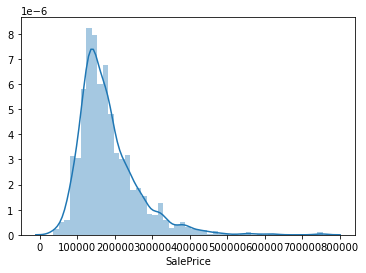

In [156]:
sns.distplot(train["SalePrice"])

Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.

In [158]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [159]:
#Relationship with numerical variables

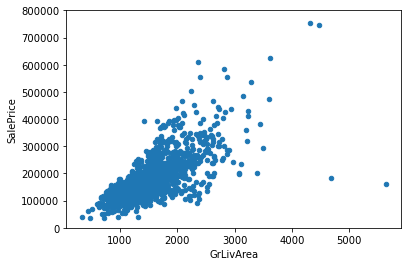

In [160]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Linear relationship exists

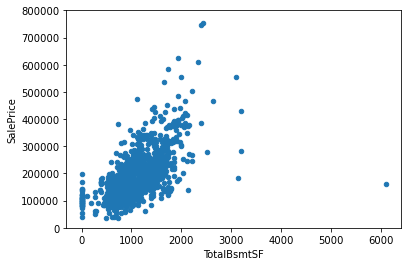

In [161]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [162]:
#Relationship with categorical features

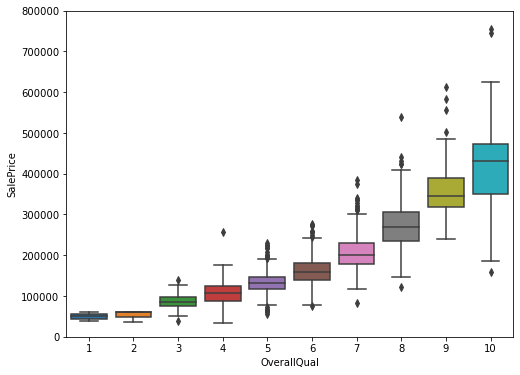

In [163]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

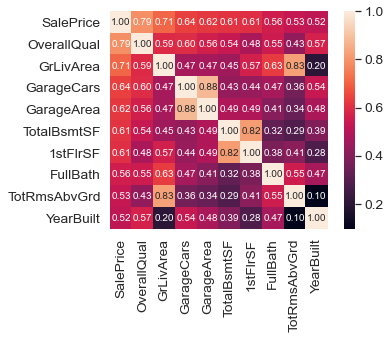

In [164]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
#relationship exist between garage cars, garage area and Target variable but we can keep Garage cars and drop area
#TotalBsmtSF and 1stFirSF both have high correlation one of them can be dropped


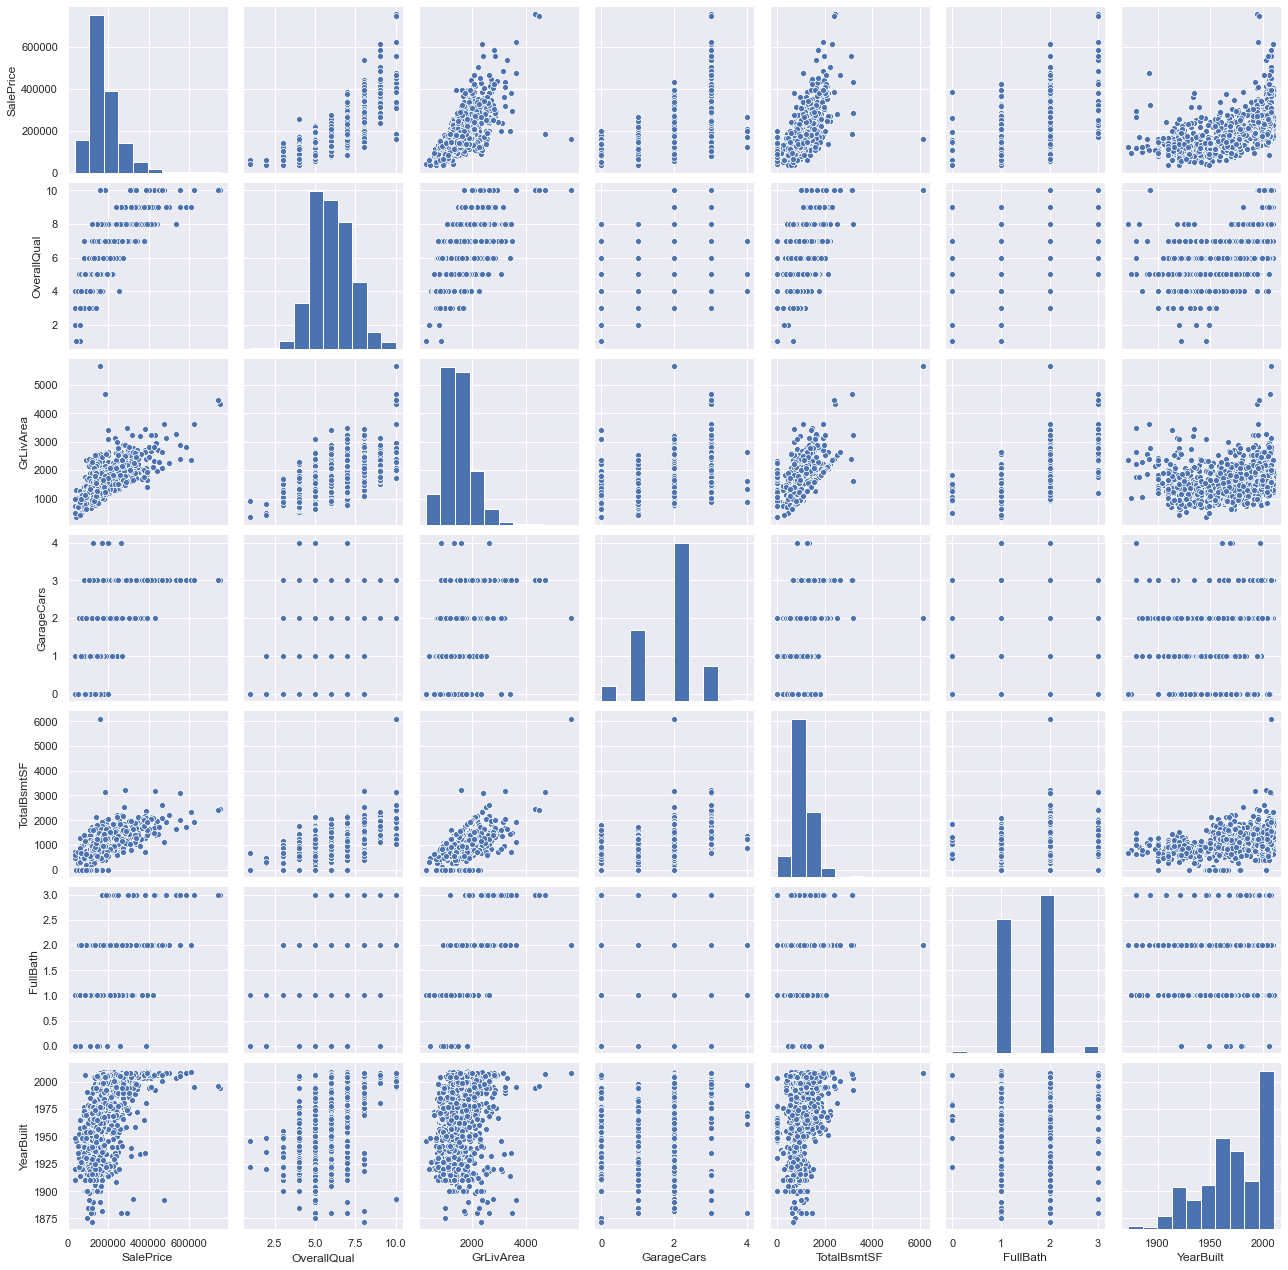

In [166]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();


 mu = 180921.20 and sigma = 79415.29



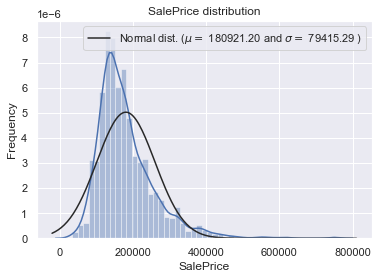

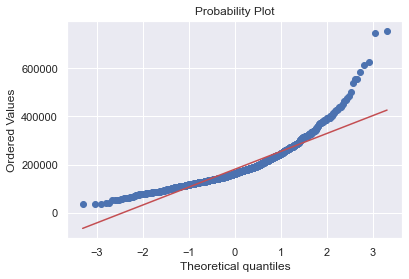

In [172]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [174]:
#The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.


 mu = 12.02 and sigma = 0.40



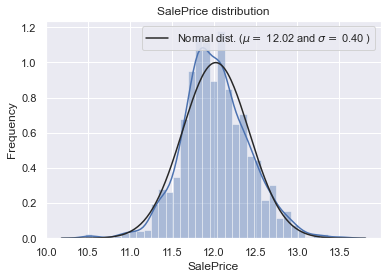

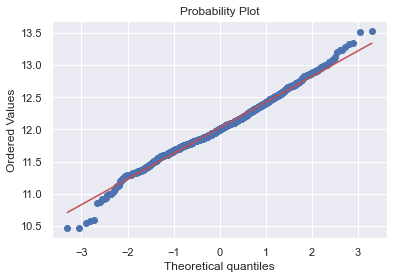

In [175]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [179]:
print(train.shape)
train.head()

(1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,12.429220


In [180]:
print(test.shape)
test.head()

(1459, 78)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,144,0,None,None,None,0,1,2010,WD,Normal


In [211]:
X=p_train.iloc[:,:80]
y=p_train.iloc[:,80:81]
X.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [212]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [217]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
#using pipeline and Decision Tree Regressor

In [219]:
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 13 and 
                    X_train[cname].dtype == "object"]

In [220]:
numerical_transformer = SimpleImputer(strategy='constant')

In [221]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [222]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

In [223]:
tree_mod=DecisionTreeRegressor(random_state=0)
tree_clf=Pipeline(steps=[("preprocessor",preprocessor),('tree_model',tree_mod)])

In [224]:
tree_clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'F...
                                                

In [225]:
tree_pred=tree_clf.predict(X_valid)

array([227875., 146500., 127500.,  75500., 162500., 286000., 340000.,
       144152., 215000., 280000., 157500.,  79000., 192500., 333168.,
       259000., 113000., 134800., 108959.,  82500., 125000., 145500.,
       124000., 264561., 326000., 105900., 250000., 119900., 180500.,
       556581., 148000.,  90000., 113000.,  90350.,  80500., 155000.,
       412500., 135000.,  82000., 244000.,  82000., 153500., 163000.,
       109000., 109500., 174000., 140000., 143000., 208900., 287090.,
       271900., 106500., 265000., 134800., 215000., 178000., 112500.,
       135500., 168500., 129900., 127500., 185750., 337000.,  88000.,
       149900., 157500., 133000., 165000., 210000., 138500., 169000.,
       153900., 135000., 337000., 144152., 184000., 250580., 160000.,
       163500., 395192., 208900., 177000., 139900., 129500., 155000.,
       180000., 147000., 177500., 186000., 274970., 146000., 208900.,
       165000., 129000.,  90000., 110500., 134900., 123500., 136000.,
       155000., 1540

In [228]:
print('MAE:', metrics.mean_absolute_error(y_valid, tree_pred))
print('MSE:', metrics.mean_squared_error(y_valid, tree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, tree_pred)))

MAE: 24636.87123287671
MSE: 1224985716.460274
RMSE: 34999.79594883767


In [240]:
y_valid.shape

(365, 1)

In [241]:
tree_pred.shape

(365,)

In [242]:
pred=pd.DataFrame({"SalePrice":tree_pred})

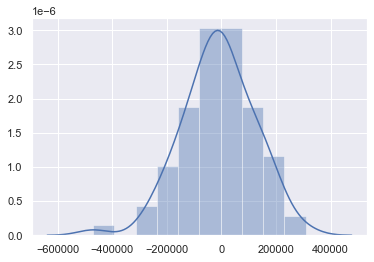

In [243]:
sns.distplot(y_valid-pred)

In [244]:
y_valid

,SalePrice
258,231500
267,179500
288,122000
649,84500
1233,142000
...,...
1017,187500
534,178000
1334,125000
1369,232000


In [245]:
pred

,SalePrice
0,227875.0
1,146500.0
2,127500.0
3,75500.0
4,162500.0
...,...
360,229456.0
361,215000.0
362,144000.0
363,230000.0


In [246]:
fin_pred=tree_clf.predict(p_test)

In [252]:
final1=pd.DataFrame({"SalePrice":fin_pred})
final1.shape

(1459, 1)

In [251]:
final1.head(10)

,SalePrice
0,129000.0
1,145000.0
2,192000.0
3,192000.0
4,180000.0
5,187000.0
6,186000.0
7,177000.0
8,190000.0
9,120500.0


In [256]:
gg=p_test["Id"]

In [255]:
p_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [262]:
g=gg.to_frame()

In [279]:
gg

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [281]:
t=pd.Series(fin_pred)

In [283]:
final1=pd.DataFrame({"Id":gg,"SalePrice":t})
final1.shape

(1459, 2)

In [284]:
final1.head()

,Id,SalePrice
0,1461,129000.0
1,1462,145000.0
2,1463,192000.0
3,1464,192000.0
4,1465,180000.0


In [285]:
#final1.to_csv("output22.csv")

In [ ]:
#Random Forrest Model

In [286]:
random_model = RandomForestRegressor(random_state=0)

random_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('random_model', random_model)
                     ])

random_clf.fit(X_train, y_train)

random_clf.fit(X_train, y_train)

random_preds = random_clf.predict(X_valid)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [287]:
print('MAE:', metrics.mean_absolute_error(y_valid, random_preds))
print('MSE:', metrics.mean_squared_error(y_valid, random_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, random_preds)))

MAE: 16091.339671232878
MSE: 630232730.9017589
RMSE: 25104.436478474454


In [288]:
fin=random_clf.predict(p_test)

In [289]:
final2=pd.DataFrame({"Id":gg,"SalePrice":fin})
final2.shape

(1459, 2)

In [290]:
final2.head()

,Id,SalePrice
0,1461,128216.66
1,1462,153768.75
2,1463,180851.57
3,1464,181587.97
4,1465,200914.91


In [293]:
#final2.to_csv("Output_random.csv",index=False)

In [294]:
# Gradient Boosting Regressor

In [295]:
gb=GradientBoostingRegressor(random_state=0)
gb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('gb_model', gb)
                     ])
gb_clf.fit(X_train,y_train)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtFullBath',
                                                   'BsmtHalfBath', 'F...
                                                

In [296]:

gb_preds = gb_clf.predict(X_valid)

In [297]:
print('MAE:', metrics.mean_absolute_error(y_valid, gb_preds))
print('MSE:', metrics.mean_squared_error(y_valid, gb_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, gb_preds)))

MAE: 14819.648708002931
MSE: 520516496.8153116
RMSE: 22814.830633062164


In [298]:
fingb=gb_clf.predict(p_test)

In [299]:
final2=pd.DataFrame({"Id":gg,"SalePrice":fingb})
final2.shape

(1459, 2)

In [301]:
#final2.to_csv("outputgb.csv",index=False)